# Introduction

**Topic Models**, in a nutshell, are a type of statistical language models used for uncovering hidden structure in a collection of texts. In a practical and more intuitively, you can think of it as a task of:

- **Dimensionality Reduction**, where rather than representing a text T in its feature space as {Word_i: count(Word_i, T) for Word_i in Vocabulary}, you can represent it in a topic space as {Topic_i: Weight(Topic_i, T) for Topic_i in Topics}.

- **Unsupervised Learning**, where it can be compared to clustering, as in the case of clustering, the number of topics, like the number of clusters, is an output parameter. By doing topic modeling, we build clusters of words rather than clusters of texts. A text is thus a mixture of all the topics, each having a specific weight.

- **Tagging**, abstract “topics” that occur in a collection of documents that best represents the information in them.


There are several existing algorithms you can use to perform the topic modeling. The most common of it are, Latent Semantic Analysis (LSA/LSI), Probabilistic Latent Semantic Analysis (pLSA), and Latent Dirichlet Allocation (LDA)

We’ll take a closer look at LDA in Python 2.7

---

### Theoretical Overview

LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

**Inputs**
- M number of documents
- N number of words
- K number of topics

**Outputs**
- psi: the distribution of words for each topic K
- phi: the distribution of topics for each document i

**Parameters of LDA**
- Alpha parameter: is Dirichlet prior concentration parameter that represents document-topic density — with a higher alpha, documents are assumed to be made up of more topics and result in more specific topic distribution per document.


- Beta parameter: is the same prior concentration parameter that represents topic-word density — with high beta, topics are assumed to made of up most of the words and result in a more specific word distribution per topic.

---

### LDA Implementation
- Loading data
- Data cleaning
- Exploratory analysis
- Prepare data for LDA analysis
- LDA model training
- Analyzing LDA model results

---

## Step 1: Loading Data

In [1]:
# Importing modules
import pandas as pd
import os


# Read data into papers
papers = pd.read_json('df_step3.json.bz2', compression='bz2', lines=True)

# Print head
papers.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,year,date_of_birth,gender,nationality,occupation,party,academic_degree,candidacy,religion
0,2015-11-14-006404,"Brexit isn't in Ireland's economic interest,",Enda Kenny,[Q5375903],2015-11-14 02:32:37,1,"[[Enda Kenny, 0.9055], [None, 0.0945]]",[http://www.independent.ie/opinion/comment/no-...,E,2015,[],[male],[Australia],[songwriter],[],[],[],[]
1,2015-04-22-037418,Leaving would be economic madness-all that har...,Gary Lewis,[Q113949],2015-04-22 05:00:56,1,"[[Gary Lewis, 0.5536], [None, 0.3997], [Nigel ...",[http://www.director.co.uk/a1-pharmaceuticals/],E,2015,[+1958-11-30T00:00:00Z],[male],[United Kingdom],"[film actor, performing artist, stage actor, t...",[],[],[],[]
2,2015-11-05-013470,Brexit could prevent emigration that would oth...,Edgar Morgenroth,[Q57152834],2015-11-05 01:00:34,6,"[[Edgar Morgenroth, 0.9296], [None, 0.0704]]",[http://www.irishtimes.com/business/economy/br...,E,2015,[],[male],[],[researcher],[],[],[],[]
3,2015-02-01-004063,Brexit: How Britain Will Leave Europe.,Denis MacShane,[Q695061],2015-02-01 09:12:29,21,"[[Denis MacShane, 0.849], [None, 0.1059], [The...",[http://news.yahoo.com/greece-shakes-europes-p...,E,2015,[+1948-05-21T00:00:00Z],[male],[United Kingdom],"[politician, trade unionist]",[Labour Party],[],"[2010 United Kingdom general election, 2005 Un...",[]
4,2015-11-10-067367,leaving the EU is not some artificial fast-tra...,Chris Mason,[Q1077516],2015-11-10 11:25:37,1,"[[Chris Mason, 0.8921], [None, 0.0993], [David...",[http://mashable.com/2015/11/10/britain-brexit...,E,2015,[+1969-12-17T00:00:00Z],[male],[United Kingdom],[darts player],[],[],[],[]


---

## Step 2: Data Cleaning

In [2]:
# Remove the columns that are not important
papers = papers.drop(columns=['quoteID', 'date', 'numOccurrences','probas','urls','phase','date_of_birth','gender','nationality','occupation','party','academic_degree','candidacy','religion'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,quotation,speaker,qids,year
91,"Brexit means Brexit, and I firmly believe we w...",Prime Minister Theresa May,[Q264766],2016
10,Brexit would mean devoting an enormous amount ...,Pat McFadden,[Q694676],2015
106,Brexit is going to be a dislocation for a long...,Henry Kravis,[Q933721],2016
105,"Brexiters are all chomping at the bit to vote,",Fabian Picardo,[Q2356379],2016
48,Brexit is an opportunity for the GCC to see th...,Karen Young,[Q121889],2016


### Remove punctuation / lower casing
We’ll remove any punctuation, and then lowercase the text

In [3]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['quotation'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the quotations to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

91     brexit means brexit and i firmly believe we wi...
10     brexit would mean devoting an enormous amount ...
106    brexit is going to be a dislocation for a long...
105        brexiters are all chomping at the bit to vote
48     brexit is an opportunity for the gcc to see th...
Name: paper_text_processed, dtype: object

---

## Step 3: Exploratory Analysis

We’ll make a simple word cloud using the wordcloud package to get a visual representation of most common words.

In [ ]:
pip install wordcloud

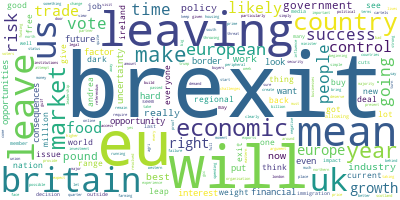

In [4]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

---

## Step 4: Prepare text for LDA analysis

Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

In [ ]:
# slow process, dont run if you already have it installed in your computer
pip install gensim 

In [ ]:
pip install nltk

In [15]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['brexit', 'means', 'brexit', 'firmly', 'believe', 'make', 'success', 'uk', 'european', 'partners', 'continue', 'work', 'together', 'keep', 'people', 'safe', 'stand', 'values', 'around', 'world']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View the dictionary/corpus equivalent to the previous word visualization
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]


---

## Step 5: LDA model tranining

We will build a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.

In [31]:
from pprint import pprint

# number of topics
num_topics = 15

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

C:\Users\soria\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.044*"brexit" + 0.018*"market" + 0.014*"impact" + 0.013*"us" + '
  '0.012*"housing" + 0.012*"means" + 0.012*"negative" + 0.012*"would" + '
  '0.012*"exports" + 0.010*"leave"'),
 (1,
  '0.061*"eu" + 0.048*"would" + 0.046*"leaving" + 0.013*"us" + 0.013*"give" + '
  '0.013*"borders" + 0.013*"peripheral" + 0.013*"control" + 0.013*"scotland" + '
  '0.011*"uk"'),
 (2,
  '0.026*"current" + 0.022*"brexit" + 0.020*"means" + 0.019*"issue" + '
  '0.018*"pound" + 0.014*"us" + 0.012*"government" + 0.012*"would" + '
  '0.011*"eu" + 0.011*"leaving"'),
 (3,
  '0.035*"would" + 0.027*"brexit" + 0.026*"eu" + 0.026*"britain" + 0.018*"one" '
  '+ 0.009*"taxes" + 0.009*"claim" + 0.009*"issue" + 0.009*"better" + '
  '0.009*"investment"'),
 (4,
  '0.052*"brexit" + 0.022*"would" + 0.013*"could" + 0.010*"economic" + '
  '0.010*"country" + 0.010*"going" + 0.010*"regional" + 0.009*"control" + '
  '0.009*"britain" + 0.009*"nation"'),
 (5,
  '0.047*"brexit" + 0.016*"last" + 0.011*"much" + 0.010*"time" + 0.

---

## Step 6: Analyzing our LDA model

Now that we have a trained model let’s visualize the topics for interpretability. To do so, we’ll use a popular visualization package, pyLDAvis which is designed to help interactively with:

1. Better understanding and interpreting individual topics, and
2. Better understanding the relationships between the topics.


For (1), you can manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic.

For (2), exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.

In [24]:
pip install pyLDAvis

C:\Users\soria\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
pip install pickle

C:\Users\soria\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle
ERROR: No matching distribution found for pickle


In [32]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

C:\Users\soria\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\soria\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.149282  0.008399       1        1  13.245710
13     0.010382 -0.079298       2        1  10.085154
10    -0.125281  0.029615       3        1   9.879293
1      0.023053  0.160039       4        1   9.104888
11    -0.068369  0.049463       5        1   8.150669
0     -0.066525 -0.058527       6        1   7.704924
6     -0.026348  0.050124       7        1   6.400149
2      0.036660  0.028973       8        1   5.936461
5      0.012814 -0.039754       9        1   5.184616
3     -0.006143  0.009504      10        1   4.963991
8      0.116435 -0.019565      11        1   4.800004
14    -0.036088 -0.081771      12        1   4.447996
12     0.019399 -0.008884      13        1   4.208024
7     -0.033974  0.029701      14        1   3.244138
9     -0.005297 -0.078018      15        1   2.643985, topic_info=           Term       Freq      Total Category  logprob  loglift
2        brexit  54.000000  54.000000  Default  30.0000  30.0000
113     britain   6.000000   6.000000  Default  29.0000  29.0000
93      leaving  13.000000  13.000000  Default  28.0000  28.0000
85           eu  24.000000  24.000000  Default  27.0000  27.0000
29        would  19.000000  19.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
115      enable   0.043762   1.185418  Topic15  -6.6928   0.3338
119    miracles   0.041443   1.186390  Topic15  -6.7472   0.2785
114  deregulate   0.040790   1.186662  Topic15  -6.7631   0.2624
117       magic   0.037775   1.187921  Topic15  -6.8399   0.1846
93      leaving   0.046746  13.996469  Topic15  -6.6268  -2.0689

[712 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
560       6  0.549236      access
574       9  0.870833     account
523      12  0.877449    actually
548       4  0.737334         add
724       8  0.742226  additional
...     ...       ...         ...
322       9  0.310462        year
155       1  0.308264       years
155       5  0.308264       years
177       1  0.509000         yes
177      13  0.509000         yes

[708 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 14, 11, 2, 12, 1, 7, 3, 6, 4, 9, 15, 13, 8, 10])

if lambda = 0 -> ves las palabras mas importantes del topic, es decir, que "solo" aparecen en ese topic, asi puedes entender mejor de qué va ese topic, o qué lo diferencia de los demás

if lambda = 1 -> ves las palabras más repetidas en el topic (rojo), y en azul la frecuencia de la palabra en total en el dataset. Pero esto no te da informacion unica sobre el topic, ni qué lo diferencia de los demás

Si quieres ver de qué va un topic, pon lambda = 0.

---

### References:
- Topic model — Wikipedia. https://en.wikipedia.org/wiki/Topic_model
- Distributed Strategies for Topic Modeling. https://www.ideals.illinois.edu/bitstream/handle/2142/46405/ParallelTopicModels.pdf?sequence=2&isAllowed=y
- Topic Mapping — Software — Resources — Amaral Lab. https://amaral.northwestern.edu/resources/software/topic-mapping
- A Survey of Topic Modeling in Text Mining. https://thesai.org/Downloads/Volume6No1/Paper_21-A_Survey_of_Topic_Modeling_in_Text_Mining.pdf